# Clustering

-> Clustering or cluster analysis is a machine learning technique, which groups the unlabelled dataset.

->It is defined as, A way of grouping the data points into different clusters, consisting of similar data points.The  

  objects with the possible similarities remain in a group that has less or no similarities with another group.

->It does it by finding some similar patterns in the unlabelled dataset such as shape, size, color, behavior, etc., and 
 
   divides them as per the presence and absence of those similar patterns.
   
->After applying this clustering technique, each cluster or group is provided with a cluster-ID.

->ML system can use this id to simplify the processing of large and complex datasets.

NOTE: Clustering is somewhere similar to the classification algorithm, but the difference is the type of dataset that we 

are using. In classification, we work with the labeled data set, whereas in clustering, we work with the unlabelled 

dataset.

# Example:

 When we visit any shopping mall, we can observe that the things with similar usage are grouped together. Such as the t-

 shirts are grouped in one section, and trousers are at other sections, similarly, at vegetable sections, apples, bananas, 

 Mangoes, etc., are grouped in separate sections, so that we can easily find out the things. The clustering technique also 

 works in the same way.
 
 # Some most common uses of this technique are:
 
1. Market Segmentation

2. Statistical data analysis

3. Social network analysis

4. Image segmentation

5. Anomaly detection, etc.

# Types of Clustering Methods:

1. Partitioning Clustering

2. Density-Based Clustering

3. Distribution Model-Based Clustering

4. Hierarchical Clustering

5. Fuzzy Clustering



# Clustering Algorithms

# 1. K-Means Algorithm
    
K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabelled dataset into different clusters. 
 
Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two 
 
clusters, and for K=3, there will be three clusters, and so on.
    
 -> It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each   
  
dataset belongs only one group that has similar properties.
    
->It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in 
    
 the unlabeled dataset on its own without the need for any training.

->It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is 
    
 to minimize the sum of distances between the data point and their corresponding clusters.
    
->The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the 
    
 process until it does not find the best clusters. The value of k should be predetermined in this algorithm.
    
->The k-means clustering algorithm mainly performs two tasks:

->Determines the best value for K center points or centroids by an iterative process.

->Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create       
a cluster.
      
 # Steps to Finding the K-Means Algorithm 
 
 
Step1:Select the number K to decide the number of clusters.
  
step2:Select random K points or centroids. (It can be other from the input dataset).

step3:Assign each data point to their closest centroid, which will form the predefined K cluster
   
step4:Calculate the variance and place a new centroid of each cluster.
   
step5:Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.
   
step6:If any reassignment occurs, then go to step-4 else go to FINISH.
   
step7:The model is ready.
   
 # Disadvantage of K-means Algorithm
 
 -> It is computationally expensive algorithm as it computes the distance of every data point with the centriods of all the 
 
 clusters at each iteration
     
 -> this makes it difficult for implementing the same for huge datasets
   

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

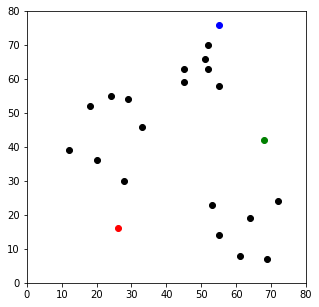

In [2]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7,  24]
})

np.random.seed(200)
k = 3
#centriods[i] = [x,y]
centriods = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'],color='k')
colmap = {1:'r', 2: 'g', 3: 'b'}
for i in centriods.keys():
    plt.scatter(*centriods[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


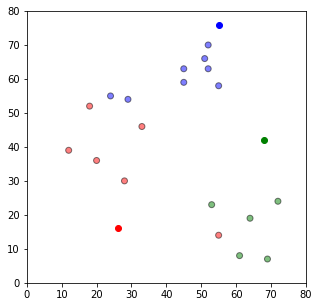

In [3]:
# Assignment Stage

def assignment(df, centriods):
    for i in centriods.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centriods[i][0]) ** 2
                + (df['y'] - centriods[i][1]) ** 2
            )
            
         )
    centriods_distance_cols = ['distance_from_{}'.format(i) for i in centriods.keys()]
    df['closest'] = df.loc[:,centriods_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centriods)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor= 'k')
for i in centriods.keys():
    plt.scatter(*centriods[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

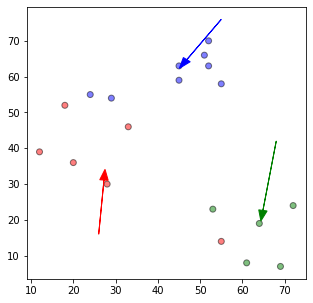

In [4]:
## update stage

import copy

old_centriods = copy.deepcopy(centriods)

def update(k):
    for i in centriods.keys():
        centriods[i][0] = np.mean(df[df['closest'] == i]['x'])
        centriods[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centriods = update(centriods)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'],color=df['color'], alpha=0.5,edgecolor='k')
for i in centriods.keys():
    old_x = old_centriods[i][0]
    old_y = old_centriods[i][1]
    dx = (centriods[i][0] - old_centriods[i][0]) * 0.75
    dy = (centriods[i][1] - old_centriods[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()        

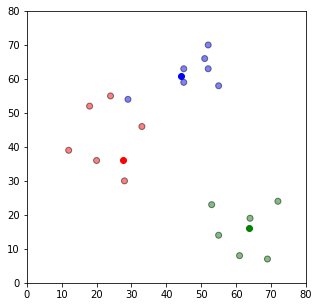

In [5]:
#Repeat Assignment Stage

df = assignment(df, centriods)

#plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centriods.keys():
    plt.scatter(*centriods[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

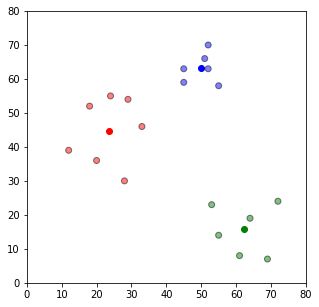

In [6]:
#continue untill all assigned categories don't change any more

while True:
    closest_centriods = df['closest'].copy(deep=True)
    centriods = update(centriods)
    df = assignment(df, centriods)
    if closest_centriods.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centriods.keys():
    plt.scatter(*centriods[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [7]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7,  24]
    
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [8]:
labels = kmeans.predict(df)
centriods = kmeans.cluster_centers_

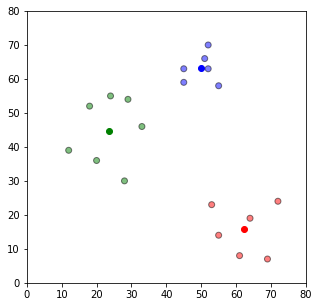

In [9]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centriod in enumerate(centriods):
    plt.scatter(*centriod, color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Mini-Batch K-means algorithm

In [10]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.datasets import make_blobs as mb
import matplotlib.pyplot as plt
import timeit as tm

In [11]:
centre = [[0, 0],
          [1000, 0],
          [1000, 1000],
          [0, 1000]]
dataset, labels = mb(n_samples = 1000, centers = centre, cluster_std = 200)

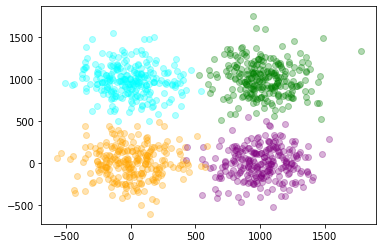

In [12]:
color = ['orange', 'purple', 'green', 'cyan']
for i in range(len(dataset)):
    plt.scatter(dataset[i][0], dataset[i][1], 
                color = color[labels[i]], alpha = 0.3)

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0)
start = tm.default_timer()
kmeans.fit(dataset)
end = tm.default_timer()
a = kmeans.labels_
centers = kmeans.cluster_centers_
print(end-start)

0.05839890000061132


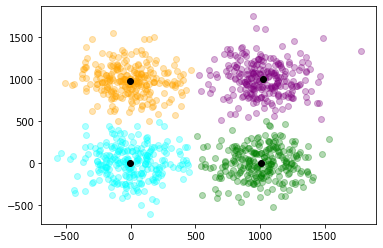

In [14]:
for i in range(len(dataset)):
    plt.scatter(dataset[i][0],dataset[i][1], color = color[a[i]], alpha = 0.3)
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], color = 'black')

In [15]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size = 20, random_state=0)
start = tm.default_timer()
kmeans.fit(dataset)
end = tm.default_timer()
a = kmeans.labels_
centers = kmeans.cluster_centers_
print(end-start)

0.24707990000024438


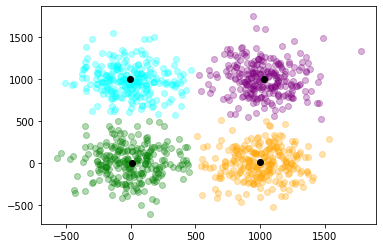

In [16]:
for i in range(len(dataset)):
    plt.scatter(dataset[i][0],dataset[i][1], color = color[a[i]], alpha = 0.3)
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], color = 'black')

As we can see that predictions of the kmeans and mini-batch kmeans algorithm are nearly equal. But the major difference is the amount of time taken by the model to train. For a dataset of 1000 data points, the kmeans algorithm has taken 0.081 seconds, whereas the mini-batch kmeans algorithm has taken 0.039 seconds.

# Why we use Mini-Batch K -means algorithm

 ->The Mini-batch K-means clustering algorithm is a version of the K-means algorithm which can be used instead of the K-
 
 means algorithm when clustering on huge datasets. 
 
 ->Sometimes it performs better than the standard K-means algorithm while working on huge datasets because it doesn't 
 
 iterate over the entire dataset.

# Hierarchical Clustering

->Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into 

groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the 

objects within each cluster are broadly similar to each other.

# Required data

->Hierarchical clustering can be performed with either a distance matrix or raw data. When raw data is provided, the 

software will automatically compute a distance matrix in the background. The distance matrix below shows the distance 

between six objects

# distance matrix:

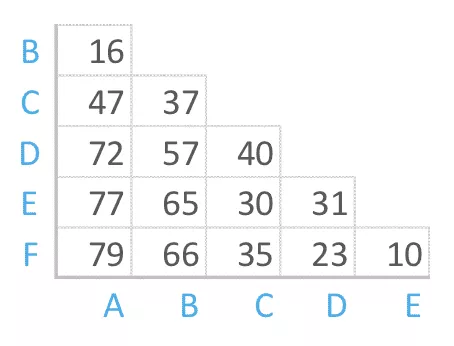

# How hierarchical clustering works:

->Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the 

following two steps: 

1. identify the two clusters that are closest together 

2. merge the two most similar clusters. This iterative process continues until all the clusters are merged together.This is 

illustrated in the diagrams below.

 

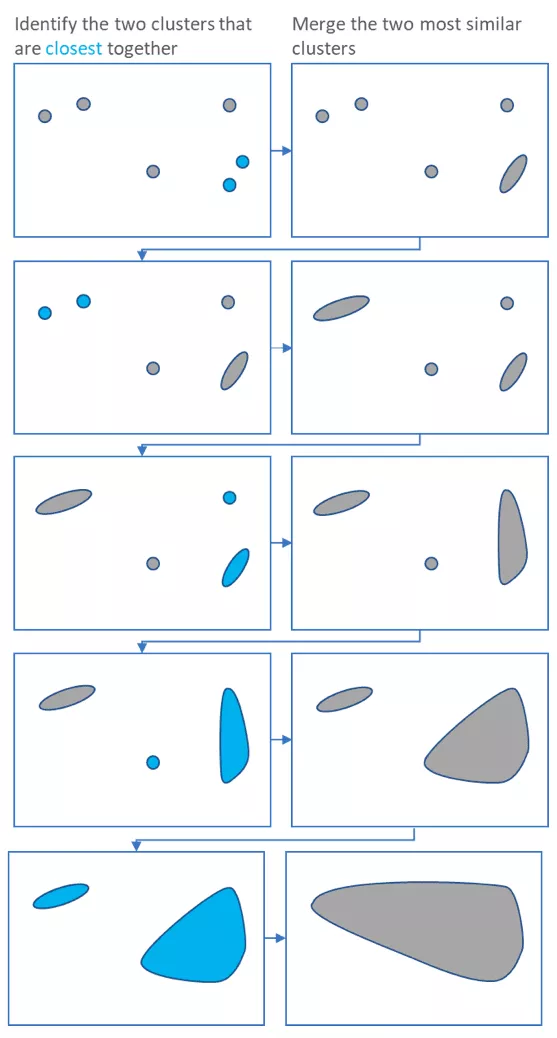

The main output of Hierarchical Clustering is a dendrogram, which shows the hierarchical relationship between the clusters:
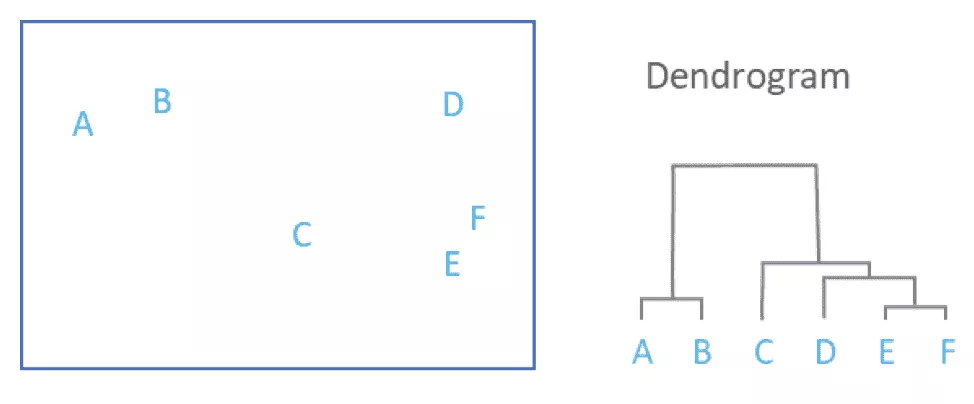

# Agglomerative versus divisive algorithms:
 
 ->Hierarchical clustering typically works by sequentially merging similar clusters, as shown above. This is known as 
 
 agglomerative hierarchical clustering. In theory, it can also be done by initially grouping all the observations into one 
 
 cluster, and then successively splitting these clusters. This is known as divisive hierarchical clustering. Divisive 
 
 clustering is rarely done in practice.
 

# Basically, there are two types of hierarchical cluster analysis strategies –

# 1.Agglomerative Clustering:

 -> Agglomerative Clustering also known as Bottom-Up approach or hierarchical agglomerative clustering (HAC).
 
 ->A structure that is more informative than the unstructured set of clusters returned by flat clustering. 
 
 ->This clustering algorithm does not require us to prespecify the number of clusters. 
 
 ->Bottom-Up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of 
 
 clusters until all clusters have been merged into a single cluster that contains all data. 

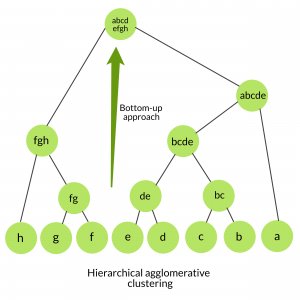

In [17]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
[4, 2], [4, 4], [4, 0]])

# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)

# print the class labels
print(clustering.labels_)

[1 1 1 0 0 0]


# 2. Divisive clustering

-> Divisive Clustering also known as a top-down approach.

->This algorithm also does not require to prespecify the number of clusters. 

->Top-down clustering requires a method for splitting a cluster that contains the whole data and proceeds by splitting 

clusters recursively until individual data have been split into singleton clusters.

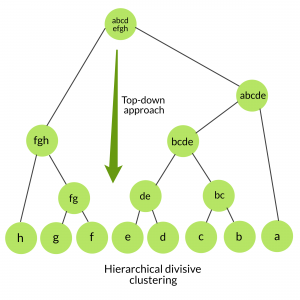